In [58]:
#Streets test query:
# all streets, without excluding highways
# view highway types below
    
#http://overpass-api.de/api/interpreter?data=[out:json][timeout:300];area[name=%22%C3%8Ele-de-France%22]-%3E.b;rel(area.b)[name=%22Paris%22];map_to_area-%3E.a;way(area.a)[highway];out%20geom;

import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

with open('./Streets test.json',encoding='UTF-8') as json_file:
    all_streets = json.load(json_file)
    
all_streets = all_streets['elements']

all_tags = []

for k,street in enumerate(all_streets):
    highway_type = street['tags']['highway']
    all_tags.append(highway_type)

pd.Series(all_tags).value_counts()

footway                   14042
residential                6405
service                    5305
steps                      4691
pedestrian                 2790
primary                    2397
cycleway                   1695
secondary                  1581
tertiary                   1473
path                       1321
unclassified                625
living_street               475
trunk_link                  364
trunk                       303
track                       259
corridor                    164
primary_link                150
elevator                     84
bridleway                    73
motorway_link                70
construction                 68
motorway                     43
secondary_link               40
tertiary_link                23
lane                          5
virtual                       4
platform                      4
disused                       3
emergency_access_point        2
proposed                      1
services                      1
access_r

In [93]:
# get streets from overpass api

import requests

url = r'http://overpass-api.de/api/interpreter?data=[out:json][timeout:1000];area[name="Île-de-France"]->.b;rel(area.b)[name="Paris"];map_to_area->.a;way(area.a)["highway"~"^(residential|steps|pedestrian|primary|secondary|tertiary|living_street)$"]["access"!="private"]["name"!~"^Cour"];out%20geom;'
r = requests.get(url,allow_redirects=True)
open('./Streets of Paris.json','wb').write(r.content)

14822280

In [1]:
# import streets and create df

import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

with open('./Streets of Paris.json',encoding='UTF-8') as json_file:
    all_streets = json.load(json_file)
    
all_streets = all_streets['elements']

df_list = []

for k,street in enumerate(all_streets):
    tags = street['tags']
    if 'name' in tags:
        geom = street['geometry']
        df = pd.DataFrame(geom)
        name = tags['name']
        df.insert(0,'segment no.',k)
        df.insert(3,'name',name)
        df_list.append(df)

df_lat_lon = pd.concat(df_list)
df_lat_lon.drop_duplicates(inplace=True)

In [2]:
# get intersections

lat_lon = ['lat','lon']
test_if_duplicate = df_lat_lon.duplicated(subset=lat_lon,keep=False)
grouped = df_lat_lon[test_if_duplicate].groupby(lat_lon)

intersection_nos = []
intersection_points = []

for group,points in grouped:
    points.reset_index(inplace=True)
    intersection_nos.append(points['segment no.'].tolist())
    intersection_points.append(points.loc[0,lat_lon])
    
df_intersections = pd.DataFrame(intersection_points)
df_intersections.insert(0,'segment nos.',intersection_nos)

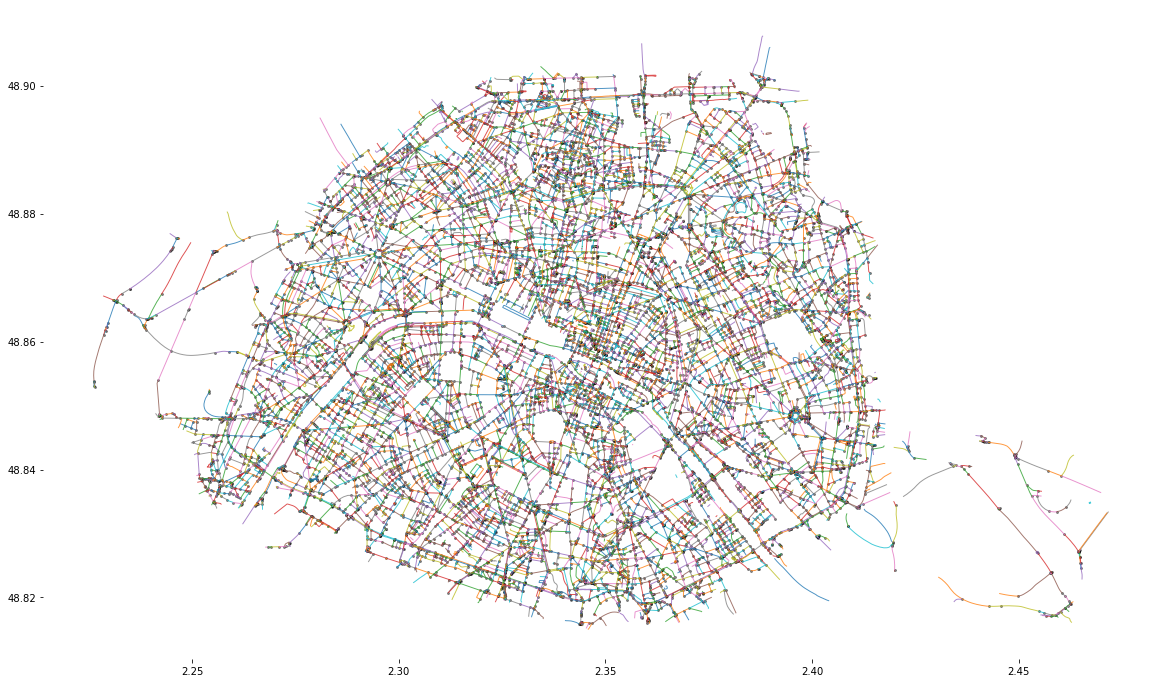

In [3]:
fig,ax = plt.subplots(1,1,figsize=(20,12))

for position in ['right','left','top','bottom']:
    ax.spines[position].set_visible(False)

for k,street in df_lat_lon.groupby('segment no.'):
    plt.plot(street['lon'],street['lat'],linewidth=0.95,alpha=0.8)
    
plt.scatter(df_intersections['lon'],df_intersections['lat'],
            marker='.',color='black',alpha=0.4,s=15)
    
plt.savefig('./Paris streets.svg')

In [27]:
import networkx as nx
from itertools import combinations

paris = nx.Graph()
segments = list(set(df_lat_lon['segment no.']))
paris.add_nodes_from(segments)
intersections = df_intersections['segment nos.'].apply(lambda x:list(combinations(x,2)))
intersections = [e for i in intersections.tolist() for e in i]
paris.add_edges_from(intersections)
#https://pypi.org/project/postman_problems/

13847